In [40]:
%reload_ext autoreload
%autoreload 2
import cv2
import albumentations as A
import numpy as np
from utils import plot_examples
from PIL import Image

In [41]:
image = cv2.imread('images/cat.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
bboxes = [[13, 170, 224, 410]]

In [42]:

transform = A.Compose(
    [
        A.Resize(width=1920, height=1080),
        A.RandomCrop(width=1280, height=720),
        A.Rotate(limit=40, p=0.9, border_mode=cv2.BORDER_CONSTANT),
        A.HorizontalFlip(p=0.5),
        A.VerticalFlip(p=0.1),
        A.RGBShift(r_shift_limit=25, g_shift_limit=25, b_shift_limit=25, p=0.9),
        A.OneOf([# choose one of several data augmentations
            A.Blur(blur_limit=3, p=0.5),
            A.ColorJitter(p=0.5)
        ], p=1.0) 
    ],
    bbox_params=A.BboxParams(format='pascal_voc', min_area=2048, min_visibility=0.3, label_fields=[])
)

23


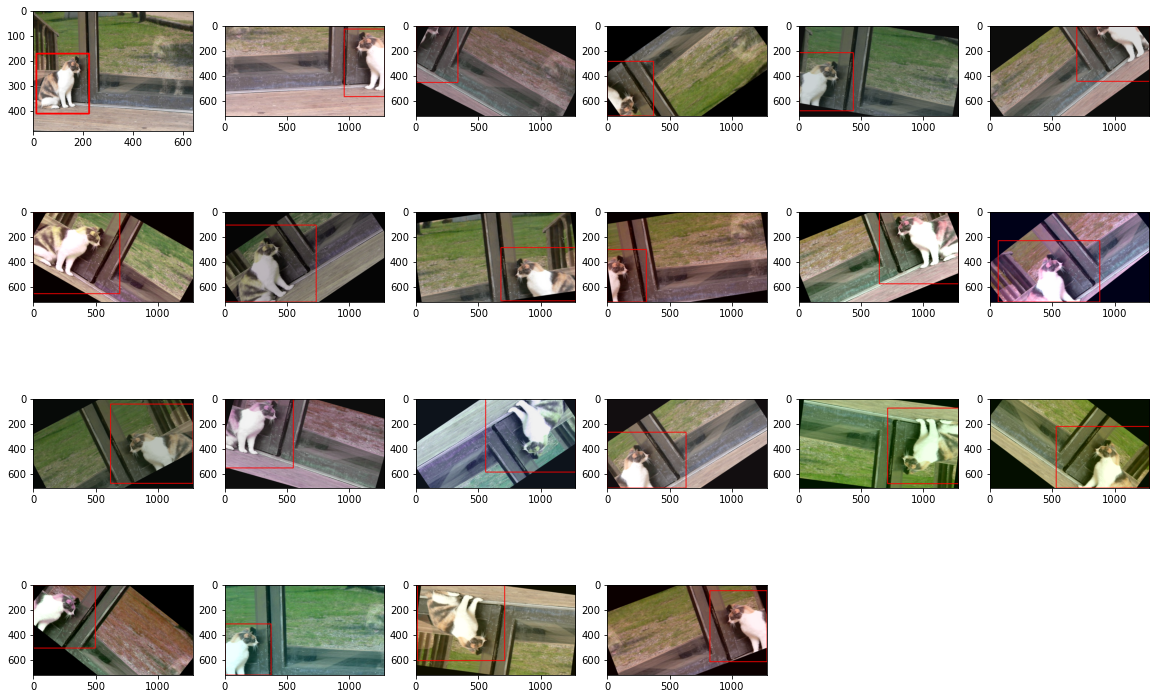

In [43]:
images_list = [image]
saved_bboxes = [bboxes[0]]

for i in range(30):
    augmentations = transform(image=image, bboxes=bboxes) # returns dictionary
    augmented_img = augmentations['image']
    
    if len(augmentations['bboxes']) == 0:
        continue
    images_list.append(augmented_img)
    saved_bboxes.append(augmentations['bboxes'][0])

print(len(images_list))
plot_examples(images_list, saved_bboxes)